In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [2]:
X=6*np.random.rand(200,1)-3
y=0.8*X**2+0.9*X+2+np.random.randn(200,1)

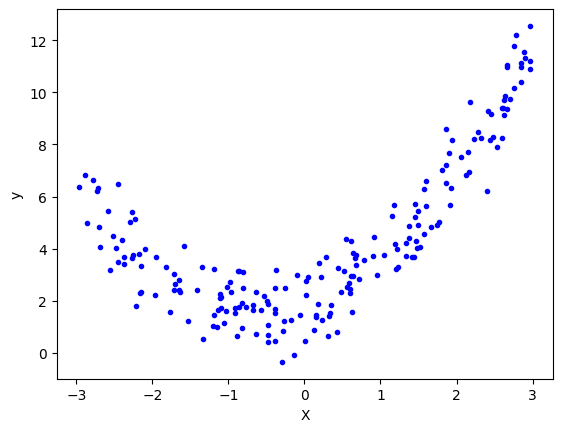

In [3]:
plt.plot(X,y,'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
lr=LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [5]:
y_pred=lr.predict(X_test)
r2_score(y_test,y_pred)


0.42274515529185963

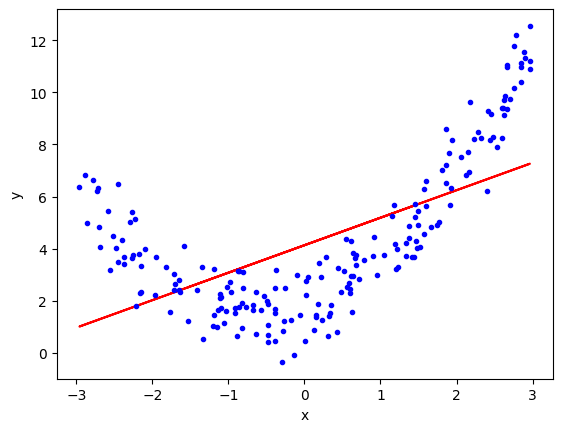

In [6]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X,y,'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [7]:
poly=PolynomialFeatures(degree=2,include_bias=True)
X_train_trans=poly.fit_transform(X_train)
X_test_trans=poly.transform(X_test)

In [8]:
print(X_train[0])
print(X_train_trans[0])

[-1.52584472]
[ 1.         -1.52584472  2.32820211]


In [9]:
lr=LinearRegression()
lr.fit(X_train_trans,y_train)
y_pred2=lr.predict(X_test_trans)

In [10]:
r2_score(y_test,y_pred2)

0.9482554411694326

In [11]:
print(lr.coef_)
print(lr.intercept_)

[[0.         0.91618252 0.77821711]]
[1.92560274]


In [12]:
X_new=np.linspace(-3,3,200).reshape(200,1)
X_new_poly=poly.transform(X_new)
y_new=lr.predict(X_new_poly)



<function matplotlib.pyplot.show(close=None, block=None)>

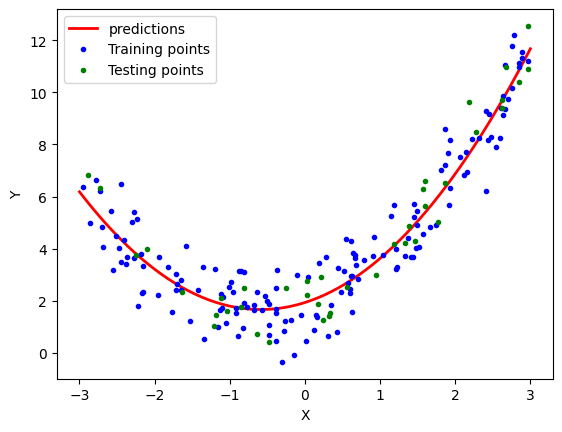

In [13]:
plt.plot(X_new,y_new,'r-',linewidth=2,label='predictions')
plt.plot(X_train,y_train,'b.',label='Training points')
plt.plot(X_test,y_test,'g.',label='Testing points')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show

In [14]:
def polynomial_regression(degree):
    X_new=np.linspace(-3,3,100).reshape(100,1)
    X_new_poly=poly.transform(X_new)
    
    polybig_features=PolynomialFeatures(degree=degree,include_bias=False)
    std_scaler=StandardScaler()
    lin_reg=LinearRegression()
    polynomial_regression=Pipeline([
        ('poly_features',polybig_features),
        ('std_scaler',std_scaler),
        ('lin_reg',lin_reg),
    ])
    polynomial_regression.fit(X,y)
    y_newbig=polynomial_regression.predict(X_new)
    plt.plot(X_new,y_newbig,'r',label='Degree'+str(degree),linewidth=2)
    
    
    plt.plot(X_train,y_train,'b.',linewidth=2)
    plt.plot(X_test,y_test,'g.',linewidth=2)
    plt.legend(loc='upper left')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.axis([-3,3,0,10])
    plt.show()

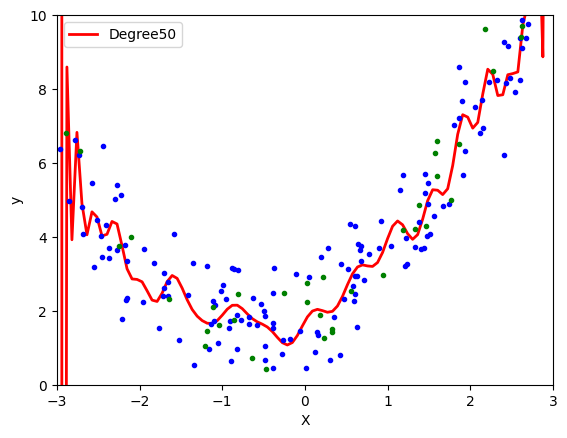

In [15]:
polynomial_regression(50)

In [16]:
poly.powers_

array([[0],
       [1],
       [2]], dtype=int64)

In [17]:
poly=PolynomialFeatures(degree=2)
X_train_trans

array([[ 1.00000000e+00, -1.52584472e+00,  2.32820211e+00],
       [ 1.00000000e+00,  2.32232440e+00,  5.39319064e+00],
       [ 1.00000000e+00, -1.71359298e+00,  2.93640089e+00],
       [ 1.00000000e+00, -9.16159402e-01,  8.39348050e-01],
       [ 1.00000000e+00, -2.14940612e+00,  4.61994668e+00],
       [ 1.00000000e+00,  6.27789836e-01,  3.94120078e-01],
       [ 1.00000000e+00,  2.11979198e+00,  4.49351803e+00],
       [ 1.00000000e+00,  2.75288855e+00,  7.57839537e+00],
       [ 1.00000000e+00,  5.98361292e-01,  3.58036236e-01],
       [ 1.00000000e+00,  1.46907659e-01,  2.15818604e-02],
       [ 1.00000000e+00,  1.21813920e+00,  1.48386310e+00],
       [ 1.00000000e+00, -2.36866573e+00,  5.61057735e+00],
       [ 1.00000000e+00,  1.73997123e+00,  3.02749988e+00],
       [ 1.00000000e+00, -2.57675401e+00,  6.63966120e+00],
       [ 1.00000000e+00, -8.78033109e-01,  7.70942141e-01],
       [ 1.00000000e+00,  5.79690924e-01,  3.36041568e-01],
       [ 1.00000000e+00,  6.08132768e-01

In [18]:
x=7*np.random.rand(100,1)-2.8
y=7*np.random.rand(100,1)-2.8

z=x**2+y**2+0.2*x+0.2*y+0.1*x*y+2+np.random.rand(100,1)

In [20]:
import plotly.express as px
df=px.data.iris()
fig=px.scatter_3d(df,x=x.ravel(),y=y.ravel(),z=z.ravel())
plt.show()